# 결정 트리 (DecisionTree)

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>max_depth</code></td>
      <td>
        트리의 최대 깊이를 규정 (디폴트: None) <br>
        None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 <code>min_samples_split</code>보다 작아질 때까지 계속 깊이를 증가시킴 <br>
        깊이가 길어지면 <code>min_samples_split</code> 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
      </td>
    </tr>
    <tr>
      <td><code>max_features</code></td>
      <td>
        최적의 분할을 위해 고려할 최대의 피처 개수 (디폴트: None / 데이터셋의 모든 피처를 사용해 분할 수행)
        <ul>
          <li><code>int</code> 형으로 지정하면 대상 피처의 개수, <code>float</code> 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트</li>
          <li><code>'sqrt'</code>는 전체 피처 중 sqrt(전체 피처 개수) 즉, 전체 피처 개수의 제곱근만큼 선택</li>
          <li><code>'auto'</code>로 지정하면 sqrt와 동일</li>
          <li><code>'log'</code>는 전체 피처 중 log2(전체 피처 개수) 선택</li>
          <li><code>'None'</code>은 전체 피처 선택</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td><code>min_samples_split</code></td>
      <td>
        노드 분할을 위한 최소 samples (디폴트 : <code>min_samples_split=2</code> == 부모노드의 sample수가 2 이상인 경우 분할, 자식노드의 sample수가 2이하일 수 있음) <br>
        작게 설정할 수록 과적합 가능성 증가
      </td>
    </tr>
    <tr>
      <td><code>min_samples_leaf</code></td>
      <td>
        분할 이후 만족시켜야 할 sample 최소 개수 (<code>min_samples_leaf=2</code>일 때, 분할 이후 자식노드의 sample수가 2개 이상이 된다면 부모노드를 분할) <br>
        작게 설정할수록 과적합 가능성 증가
      </td>
    </tr>
    <tr>
      <td><code>max_leaf_nodes</code></td>
      <td>분할 이후 leaf_node 최대개수</td>
    </tr>
    <tr>
      <td><code>criterion</code></td>
      <td>
        분할을 위해 사용할 성능 평가 지표 설정 <br>
        <code>gini</code> 또는 <code>entropy</code> 값을 사용할 수 있으며, <code>gini</code>는 지니 계수를, <code>entropy</code>는 정보 이득을 기반으로 분할 기준을 결정
      </td>
    </tr>
    <tr>
      <td><code>min_weight_fraction_leaf</code></td>
      <td>
        리프 노드가 전체 가중치에서 차지해야 하는 최소 비율 (디폴트: 0) <br>
        특정 클래스의 데이터가 지나치게 적은 경우 과적합을 방지하기 위해 사용
      </td>
    </tr>
  </tbody>
</table>

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 결정트리 - 분류 (DecisionTreeClassifier)

### wine 이진 분류

- 와인 품질 데이터셋을 가공 > 레드/화이트 와인 이진분류 데이터셋
    - 0: 레드 와인
    - 1: 화이트 와인

In [116]:
# 데이터 로드
wine_df = pd.read_csv('./data/wine_simple.csv')
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [117]:
# 데이터 분리 및 스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine_df.drop('class', axis=1)
y = wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)

# 결정 트리 모델은 데이터 스케일링 영향이 적음
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

(4872, 3) (1625, 3)


In [118]:
# 모델 학습 및 평가
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_clf.fit(X_train, y_train)

dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.8433908045977011, 0.8584615384615385)

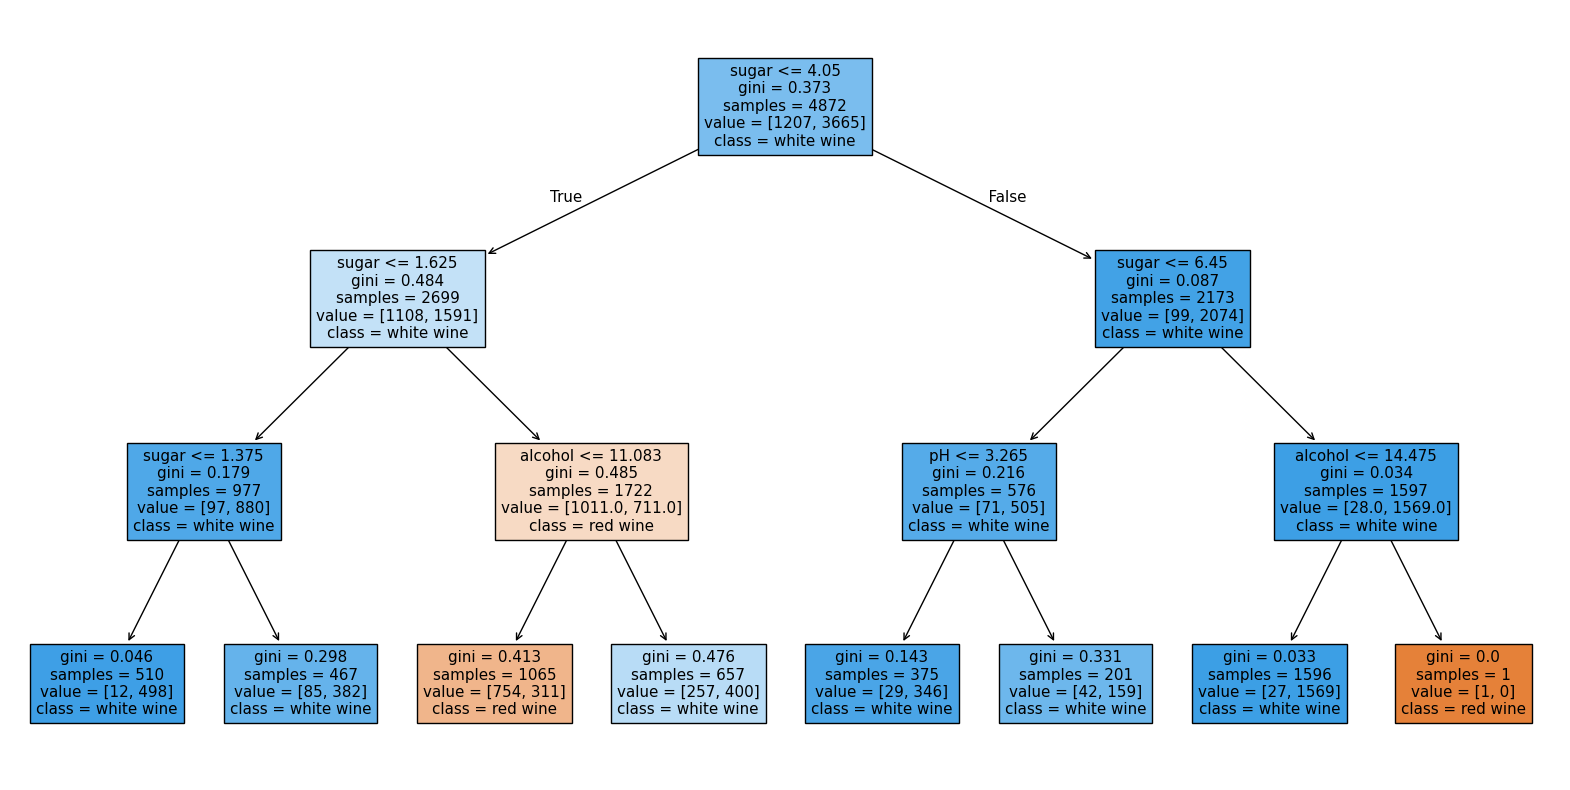

'\nsugar <= -0.284     : DesicionTreeClassifier이 정한 분할 기준\ngini = 0.373        : 지니계수(지니 불순도)\nsamples = 4872      : 현재 노드의 전체 샘플수\nvalue [1207, 3665]  : 클래스별 샘플 개수(0번 클래스 1207, 1번 클래스가 3665)\nclass = white wine  : 현재 노드의 클래스(= value가 많은 클래스)\n'

In [119]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    filled=True,                                # 색 채우기 옵션(특정 클래스+해당 클래스의 비율)
    feature_names=X.columns,                    # 특성 이름(조건에 표시)
    class_names=['red wine', 'white wine'],     # 클래스 이름(비율이 높은 클래스 표시)
    # max_depth=3
)
plt.savefig('wine_simple.png')
plt.show()

"""
sugar <= -0.284     : DesicionTreeClassifier이 정한 분할 기준
gini = 0.373        : 지니계수(지니 불순도)
samples = 4872      : 현재 노드의 전체 샘플수
value [1207, 3665]  : 클래스별 샘플 개수(0번 클래스 1207, 1번 클래스가 3665)
class = white wine  : 현재 노드의 클래스(= value가 많은 클래스)
"""

In [120]:
# 지니 불순도 직접 계산
1 - ((12 / 510)**2 + (498 / 510)**2)

0.04595155709342569

In [121]:
# 특성 중요도
# [alcohol, sugar, pH] 순서
dt_clf.feature_importances_

array([0.11483515, 0.87892904, 0.00623581])

### iris 다중 분류


In [122]:
# 데이터 로드 및 분리
from sklearn.datasets import load_iris

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=0)

In [123]:
# 모델 학습 및 평가
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)

dt_clf.fit(X_train, y_train)
dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(0.9821428571428571, 0.9736842105263158)

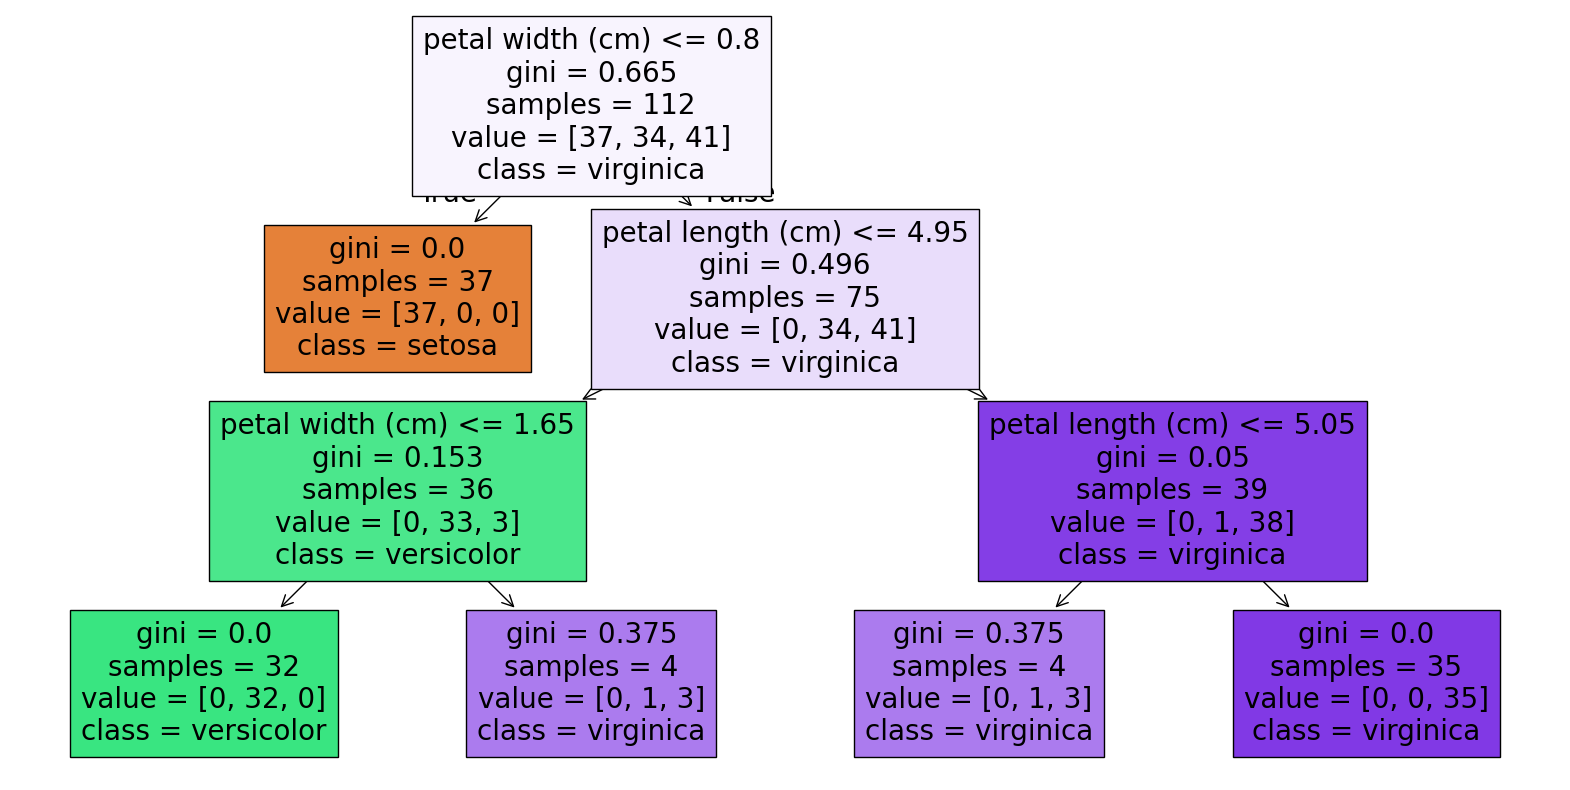

In [124]:
# 트리모델 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    dt_clf,
    filled=True,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names
)
plt.show()

In [125]:
# 지니불순도 감소에 기여한만큼 중요도가 높아짐
print(iris_data.feature_names)
dt_clf.feature_importances_

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0.        , 0.        , 0.42232109, 0.57767891])

- 내가 도출한 인사이트
    - petal_width가 0.8 보다 작으면 전부 setosa 로 분리가 되는 걸 볼 수 있습니다. (분류하기가 매우 쉽다.)
    - setosa 클래스가 한 번에 gini 불순도 = 0으로 리프 노드에 분류되었다.
    - sample이 4개여도 리프 노드가 분류되는 것이 있다. (최소 샘플 수가 작은 것으로 추정)
    - 꽃잎 너비가 가장 큰 영향을 받는다.
    - sepal 특징은 꽃을 구분하는데 관련이 없다.

## 결정트리 - 회귀 (DecisionTreeRegressor)

In [126]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [127]:
X_train, X_test, y_train, y_test = train_test_split(housing_data.data, housing_data.target, random_state=0)

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=8)
# 학습
dt_reg.fit(X_train, y_train)

# 예측
pred_train = dt_reg.predict(X_train)
pred_test = dt_reg.predict(X_test)

# 평가
mse_train = mean_squared_error(y_train, pred_train)
r2_train = r2_score(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

print(f"훈련 데이터에 대한 평가: mse {mse_train}, r2 {r2_train}")
print(f"테스트 데이터에 대한 평가: mse {mse_test}, r2 {r2_test}")

훈련 데이터에 대한 평가: mse 0.32342609927780885, r2 0.7576694150548335
테스트 데이터에 대한 평가: mse 0.4391632362998888, r2 0.6677663736640318


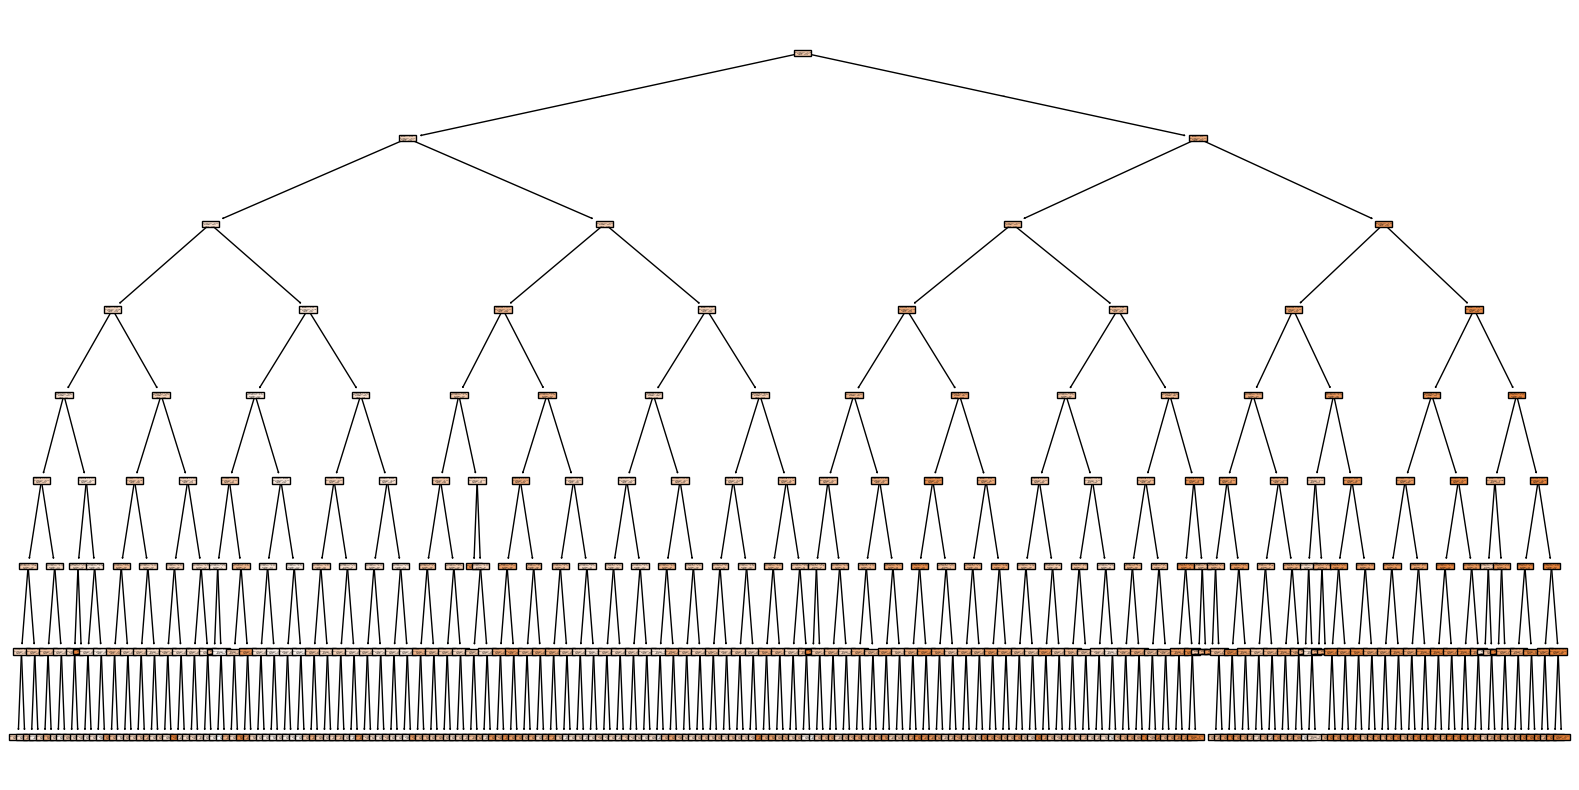

In [ ]:
# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(
    dt_reg,
    filled=True,
    feature_names=housing_data.feature_names
)
plt.show()

In [ ]:
# 특성 중요도
dt_reg.feature_importances_

array([0.66666005, 0.04645916, 0.03092624, 0.00776429, 0.00973237,
       0.13335818, 0.05205479, 0.05304491])

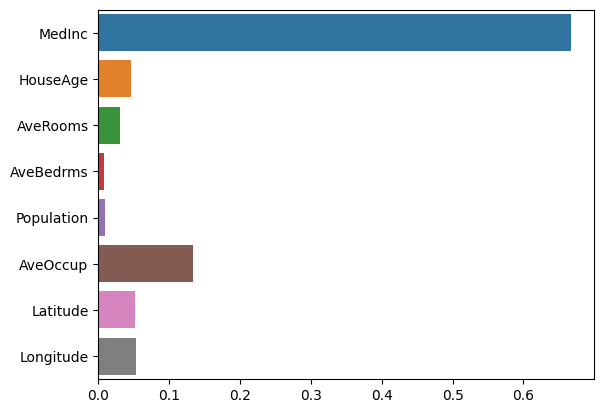

In [ ]:
# 특성 중요도 시각화
sns.barplot(
    x=dt_reg.feature_importances_,
    y=housing_data.feature_names,
    hue=housing_data.feature_names
)
plt.show()